In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%  matplotlib inline

In [18]:
d0=pd.read_csv("mnist_train.csv")

In [21]:
d0.head()

TypeError: head() got an unexpected keyword argument 'axis'

In [24]:
d=d0.drop('label', axis=1)

In [25]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


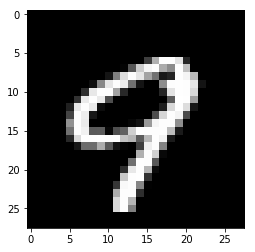

In [117]:
plt.Figure(figsize=(11,11))
idx=100
plt.imshow(d.iloc[idx].values.reshape(28,28),cmap='gray')

# pca

In [66]:
#importing decomposition for PCA
from sklearn import decomposition


In [80]:
#slicing the data 
d1=d.iloc[:15000,:]

In [81]:
#assigning the components
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(d1)

In [82]:
print('shape of transformed data after pca',pca_data.shape)

shape of transformed data after pca (15000, 2)


In [98]:
#visualizing the transformed data
#adding label to the data for the visualisation
pca_data_viz=np.vstack((pca_data.T,d0["label"][:15000])).T
pca_data_viz=pd.DataFrame(pca_data_viz,columns=['1st-dim','2nd-dim','label'])

In [100]:
pca_data_viz.head()

,1st-dim,2nd-dim,label
0,-658.354281,702.818246,1.0
1,1699.878324,376.237326,0.0
2,-897.009470,294.639832,1.0
3,-169.198322,-259.139272,4.0
4,1924.764976,463.174081,0.0


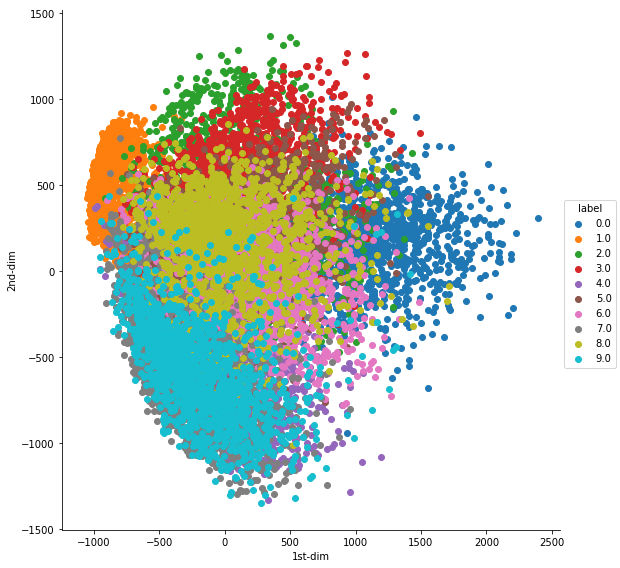

In [119]:
plt.Figure(figsize=(21,21))
sn.FacetGrid(pca_data_viz,hue='label',size=8).map(plt.scatter,'1st-dim','2nd-dim').add_legend()